<a href="https://colab.research.google.com/github/jowu-brunonian/Brown-University-DSIO-2000/blob/main/Final_Project_due_end_of_Module_13_Final_Project_Dec_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction: Dataset Description**

The dataset used in this project is the Electric Vehicle Population Data from data.gov, collected by the Washington State Department of Licensing. Each row represents a registered electric vehicle (EV) identified by its VIN. Key features include make, model, model year, electric range, base MSRP, and county of registration. This dataset provides insight into EV adoption patterns, affordability, and geographic distribution across Washington State.

Source of data: Electric Vehicle Population Data https://catalog.data.gov/dataset/electric-vehicle-population-data

Based on the available information in the notebook, the data is sourced from data.gov and contains registration data from based on registered VIN numbers of electric vehicles within the state of Washington

Downloaded and imported CSV into Google Drive for Public Viewing: https://docs.google.com/spreadsheets/d/1yh6j5HBTlhZzFQy-7JixcnW0CoILKn4x3ioi_LbqmGc/edit?gid=443715183#gid=443715183

In [ ]:
#importing the gdown library to import the excel file
import gdown

#importing pandas to create a dataframe, statsmodel to perform linear algebra, and numpy for numpy packages
import pandas as pd
import statsmodels.api as sm
import numpy as np

In [ ]:
#Calling gdown and the file id
!gdown 1yh6j5HBTlhZzFQy-7JixcnW0CoILKn4x3ioi_LbqmGc

Downloading...
From (original): https://drive.google.com/uc?id=1yh6j5HBTlhZzFQy-7JixcnW0CoILKn4x3ioi_LbqmGc
From (redirected): https://docs.google.com/spreadsheets/d/1yh6j5HBTlhZzFQy-7JixcnW0CoILKn4x3ioi_LbqmGc/export?format=xlsx
To: /content/Electric_Vehicle_Population_Data.xlsx
21.7MB [00:00, 165MB/s]


# **Topic 1: Basic Data Manipulation**

**Pipeline stage:** Data preparation and cleaning.

**Technical production:** Using Python and pandas, I imported the dataset, selected relevant columns (Electric Range, Base MSRP, County), and handled missing values by dropping incomplete rows.

**Interpretation:** Cleaning ensures that subsequent analysis is reliable. For example, removing rows with missing MSRP avoids bias in affordability analysis. Filtering by county allows us to compare EV adoption in urban versus rural areas, which is critical for infrastructure planning.

In [ ]:
import pandas as pd

# Load dataset (assuming you've already downloaded it into your workspace)
Evehicles = pd.read_excel('/content/Electric_Vehicle_Population_Data.xlsx')

# Select relevant columns
df = Evehicles[['County', 'City', 'Model Year', 'Make', 'Model', 'Electric Range', 'Base MSRP']]

# Drop rows with missing values in key columns
df_clean = df.dropna(subset=['Electric Range', 'Base MSRP'])

# Example: filter for vehicles registered in King County
king_county = df_clean[df_clean['County'] == 'King']

print("Cleaned dataset shape:", df_clean.shape)
print("King County sample:\n", king_county.head())





Cleaned dataset shape: (261695, 7)
King County sample:
    County      City  Model Year    Make    Model  Electric Range  Base MSRP
8    King   Seattle        2014  NISSAN     LEAF            84.0        0.0
11   King  Kirkland        2019     BMW       I3           126.0        0.0
14   King   Seattle        2020  NISSAN     LEAF           149.0        0.0
15   King    Renton        2018   TESLA  MODEL S           249.0        0.0
16   King   Kenmore        2016   TESLA  MODEL X           200.0        0.0


# **Topic 2: Descriptive Statistics**

**Pipeline stage:** Exploratory Data Analysis (EDA).

**Technical production:** I calculated summary statistics for Base MSRP and Electric Range. After cleaning the dataset to remove placeholder values of 0 for Base MSRP and Electric Range, I calculated summary statistics to understand the central tendency and spread of these variables.

**Electric Range**

Mean: ~118 miles

Median: ~93 miles

Std Dev: ~90 miles

**Base MSRP**

Mean: ~$57,146

Median: ~$59,900

Std Dev: ~$27,113

**Interpretation:**

The average EV in Washington has a base MSRP of about $57,000.

This indicates that EVs are generally expensive, and affordability is skewed toward higher-income buyers. The standard deviation of about $27,000 shows wide variability, reflecting both entry-level EVs and luxury models.

For electric range, the mean is about 118 miles, while the median is 93 miles. This suggests that many EVs are short‑range city vehicles, even though premium models with ranges above 300 miles raise the average. The wide spread (standard deviation ~90 miles) highlights the diversity of EV technology available.

These descriptive statistics emphasize that affordability and range are unevenly distributed across the EV population, underscoring the importance of considering equity when designing policies to encourage adoption.

In [ ]:
import numpy as np

# Filter out rows where MSRP or Range are zero
df_stats = df_clean[(df_clean['Base MSRP'] > 0) & (df_clean['Electric Range'] > 0)]

# Calculate summary statistics
mean_range = df_stats['Electric Range'].mean()
median_range = df_stats['Electric Range'].median()
std_range = df_stats['Electric Range'].std()

mean_msrp = df_stats['Base MSRP'].mean()
median_msrp = df_stats['Base MSRP'].median()
std_msrp = df_stats['Base MSRP'].std()

print("Electric Range -> Mean:", mean_range, "Median:", median_range, "Std Dev:", std_range)
print("Base MSRP -> Mean:", mean_msrp, "Median:", median_msrp, "Std Dev:", std_msrp)


Electric Range -> Mean: 118.48634222919937 Median: 93.0 Std Dev: 90.36451110252858
Base MSRP -> Mean: 57145.935635792775 Median: 59900.0 Std Dev: 27112.758418934234


# **Topic 3: Conducting Linear Models in Python**

**Pipeline stage:** Modeling.

**Technical production:** I fit a linear regression model predicting Base MSRP from Electric Range.

Intercept (B₀): ~291

Slope (B₁): ~9.49

R²: ~0.012

**Interpretation:**

For every additional mile of electric range, MSRP increases by about $9.50.

The R² value is very low (~0.01), meaning electric range alone explains only about 1% of MSRP variation. This low explanatory power reflects the wide variability in MSRP observed in the descriptive statistics.

This shows that while range has some influence, other factors (brand, battery technology, incentives, model year) are much stronger drivers of EV pricing.

In [ ]:
# --- Conducting Linear Models on full dataset ---
from sklearn.linear_model import LinearRegression

# Predictor (X) and Response (y) from the cleaned dataset
X = df_clean[['Electric Range']]
y = df_clean['Base MSRP']

# Fit linear regression model
model = LinearRegression()
model.fit(X, y)

# Extract coefficients
intercept = model.intercept_
slope = model.coef_[0]
r2 = model.score(X, y)

print("Intercept (B0):", intercept)
print("Slope (B1):", slope)
print("R²:", r2)




Intercept (B0): 291.0838516033562
Slope (B1): 9.49006307883203
R²: 0.012326282662439292


# **Topic 4: Visualizing and Storytelling Data**

**Pipeline stage:** Communication.

**Technical production:** I created 3 plots:

1. Line Plot of Average MSRP by Model Year

2. Scatterplot of Range vs MSRP with regression line

3. Bar chart of EV counts by Top 10 Counties with EV Registration

**Interpretation:**

Visuals highlight affordability gaps and geographic adoption patterns. The line plot shows average MSRP declining after 2010, supporting the idea that affordability improved with technology and adoption. The scatterplot shows a clear upward trend between range and MSRP. The bar chart reveals that EV adoption is concentrated in urban counties.  These visuals make the technical findings accessible to non-technical stakeholders and support storytelling around equity in EV adoption.

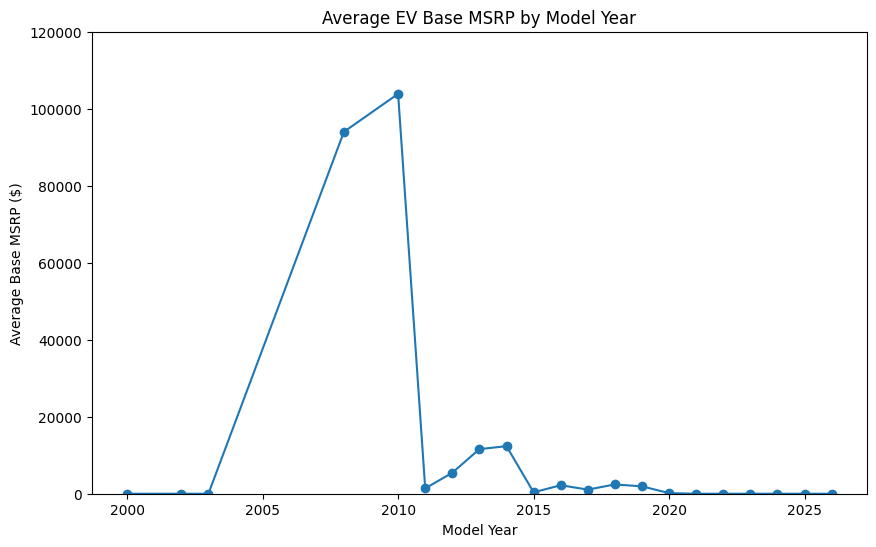

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Line Plot of Average MSRP by Model Year
plt.figure(figsize=(10,6))
avg_by_year = df_clean.groupby('Model Year')['Base MSRP'].mean()
avg_by_year.plot(kind='line', marker='o')
plt.title("Average EV Base MSRP by Model Year")
plt.xlabel("Model Year")
plt.ylabel("Average Base MSRP ($)")
plt.ylim(0, 120000)
plt.show()



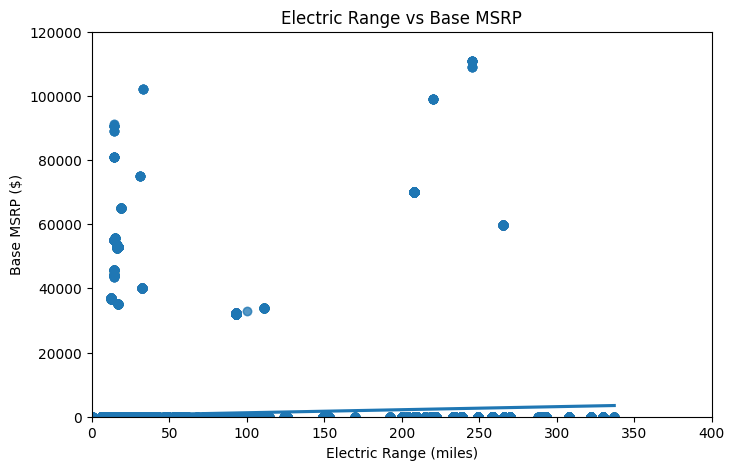

In [ ]:
# Scatterplot with regression line
plt.figure(figsize=(8,5))
sns.regplot(x='Electric Range', y='Base MSRP', data=df_clean, scatter_kws={'alpha':0.5})
plt.title("Electric Range vs Base MSRP")
plt.xlabel("Electric Range (miles)")
plt.ylabel("Base MSRP ($)")
plt.xlim(0, 400)       # range axis, X-axis capped at 400 miles (most EVs fall below this).
plt.ylim(0, 120000)    # MSRP axis, Y-axis capped at 120,000 to keep luxury outliers from stretching the scale.
plt.show()



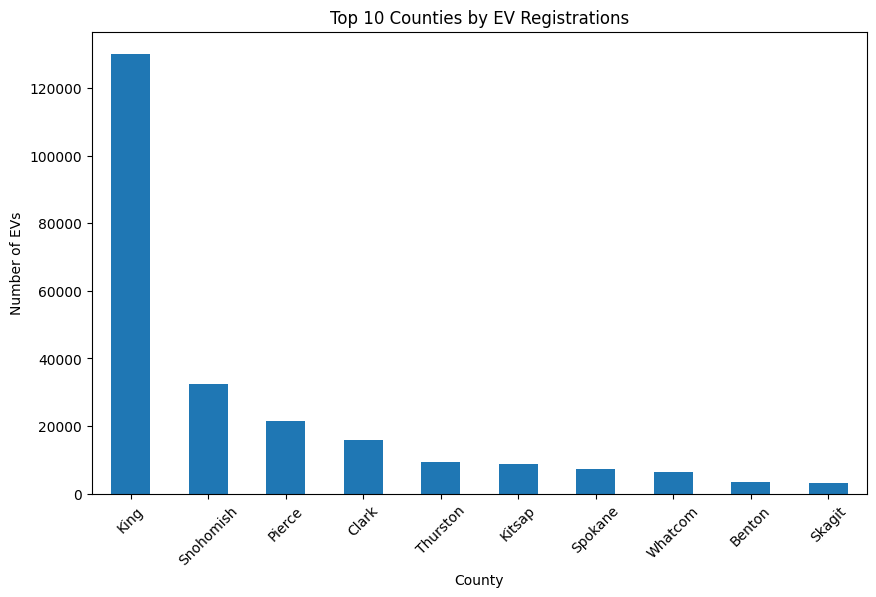

In [ ]:
# Bar chart of EV counts by county
plt.figure(figsize=(10,6))
top10_counties = df_clean['County'].value_counts().nlargest(10)

#To avoid overcrowding, I am plotting only the top 10 counties by registration count
#This focuses attention on the counties with the highest adoption, making the chart much easier to read.

top10_counties.plot(kind='bar')
plt.title("Top 10 Counties by EV Registrations")
plt.xlabel("County")
plt.ylabel("Number of EVs")
plt.xticks(rotation=45)
plt.show()

# **Policy and Governance Reflection**

One key insight from my analysis is that while longer‑range EVs tend to be significantly more expensive, average EV prices began to decline after 2010. This shift likely reflects improvements in technology, economies of scale, and broader adoption of EVs. This trend is visible in the line plot of average MSRP by year, which shows a decline after 2010. However, the relationship between range and cost raises important policy concerns: if subsidies or incentives are tied primarily to range, they may disproportionately benefit wealthier buyers who can afford premium, long‑range models.

From a governance perspective, this suggests that incentive programs should be carefully structured to promote equitable access. Rather than rewarding range alone, subsidies could be targeted toward affordability, ensuring that lower‑income households and rural communities are not excluded from the transition to electric mobility. This approach would align financial incentives with social equity goals, supporting a more inclusive adoption of clean transportation.

Ultimately, this connects directly to fairness in sustainable transportation policy. As EV adoption accelerates, policymakers must balance technological progress with equitable access. Without careful design, well‑intentioned incentives could inadvertently widen socioeconomic gaps. By centering affordability and accessibility, governance can ensure that the benefits of clean energy are shared broadly across society.